## 1. Cargando datos

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# lectura de dataset csv
dataset = pd.read_csv("dataset_SCL.csv")

In [3]:
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


## 2. Explorando datos

In [4]:
# que columnas tienen los datos?
dataset.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [5]:
# qué tamaño tienen los datos?
dataset.shape

(68206, 18)

In [6]:
# hay valores nulos en los datos?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [7]:
# como se distribuyen las variables numéricas
dataset.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [8]:
# como se comportan las variables categóricas
dataset.describe(include=["O"])

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68206,68206,68206,68206,68206,68206,68205,68206,68206,68206,68206,68206,68206,68206,68206
unique,53252,750,1,64,30,62774,866,1,63,32,7,2,23,1,62
top,2017-07-28 13:30:00,174,SCEL,SCFA,LAN,2017-11-05 14:51:00,174,SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,6,686,68206,5787,37611,5,649,68206,5786,20988,10292,36966,40892,68206,6335


## 2.1 EDA: Estudio de variable target

In [9]:
# TIPOVUELO vs OPERA
dataset.groupby(["TIPOVUELO","DIANOM"]).count()["OPERA"]

TIPOVUELO  DIANOM   
I          Domingo      4547
           Jueves       4440
           Lunes        4492
           Martes       4333
           Miercoles    4419
           Sabado       4491
           Viernes      4518
N          Domingo      5249
           Jueves       5811
           Lunes        5639
           Martes       5329
           Miercoles    5303
           Sabado       3861
           Viernes      5774
Name: OPERA, dtype: int64

TIPOVUELO  DIANOM   
I          Domingo      4547
           Jueves       4440
           Lunes        4492
           Martes       4333
           Miercoles    4419
           Sabado       4491
           Viernes      4518
N          Domingo      5249
           Jueves       5811
           Lunes        5639
           Martes       5329
           Miercoles    5303
           Sabado       3861
           Viernes      5774
Name: OPERA, dtype: int64


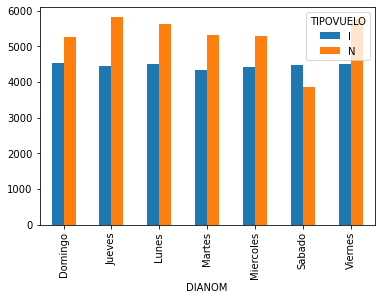

In [10]:
#plot
plot = dataset.groupby(["TIPOVUELO","DIANOM"]).count()["OPERA"]
print(plot)
(plot.unstack(level=0).plot.bar())
plt.show()

## 3. Respuestas

## Pregunta Numero 2

In [11]:
#crear columna condicional
dataset["temporada_alta"]=np.where(dataset["Fecha-I"]>"00:15:00",1,0)

In [12]:
#transformar columnas a datetime
dataset["Fecha-I"]=pd.to_datetime(dataset["Fecha-I"])
dataset["Fecha-O"]=pd.to_datetime(dataset["Fecha-O"])

In [13]:
#diferencia de tiempo
dif_min= dataset["Fecha-O"]-dataset["Fecha-I"]

In [14]:
#agregar columnas 
dataset=dataset.assign(dif_min=dif_min.values)

In [15]:
#crear columna condicional
dataset["atraso_15"]=np.where(dataset["dif_min"]>"00:15:00",1,0)

In [16]:
#crear columna condicional
dataset["periodo_dia"]=np.where(dataset["Fecha-I"]>"00:15:00",1,0)

In [17]:
#comprobar
dataset.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,0 days 00:03:00,0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,0 days 00:09:00,0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,0 days 00:09:00,0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,0 days 00:03:00,0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-1 days +23:58:00,0,0


In [18]:
# crear dataframe 
df=pd.DataFrame(dataset)

In [19]:
# Expotar df a csv con puntos y comas
dataset.to_csv("synthetic_features.csv", sep=";" , encoding="utf-8")

## 3.Procesamiento de datos

Empezamos seleccionando las variables que queremos trabajar que serían: 
* temporada_alta
* atraso_15
* perido_dia

In [20]:
dataset[["temporada_alta","atraso_15","periodo_dia"]].head(3)

,temporada_alta,atraso_15,periodo_dia
0,1,0,0
1,1,0,0
2,1,0,0


In [21]:
dataset[["temporada_alta","atraso_15","periodo_dia"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   temporada_alta  68206 non-null  int64
 1   atraso_15       68206 non-null  int64
 2   periodo_dia     68206 non-null  int64
dtypes: int64(3)
memory usage: 1.6 MB


-----------------------
Analisis

*    Datos en perfecto estado sin datos nulos y tipo int.
-----------------------

In [22]:
# variable dependiente
Y_train = dataset["atraso_15"]

# preprocesamiento de variables independientes
features = ["temporada_alta","periodo_dia"]
X_train = dataset[features]

print(Y_train.shape, X_train.shape)

(68206,) (68206, 2)


## 4. Modelos

* regresión logistica
* arboles de decisión

In [23]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [24]:
# entrenando modelo arboles de decisión
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

## 5. Evaluación

Aquí vamos a hacer una matriz de confusión y evaluar que tan bueno es cada modelo

In [25]:
from sklearn.metrics import plot_confusion_matrix

def conf_mat_acc(modelo):
  disp = plot_confusion_matrix(modelo, X_train, Y_train,
                        cmap=plt.cm.Blues, values_format="d")
  true_pred = disp.confusion_matrix[0,0]+disp.confusion_matrix[1,1]
  total_data = np.sum(disp.confusion_matrix)
  accuracy = true_pred/total_data
  print('accuracy: ', np.round(accuracy, 2))
  plt.show()

accuracy:  0.82


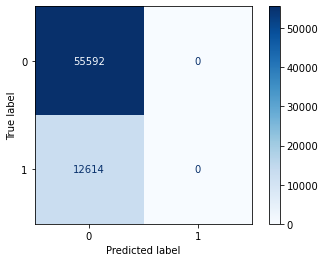

In [26]:
conf_mat_acc(logreg)

accuracy:  0.82


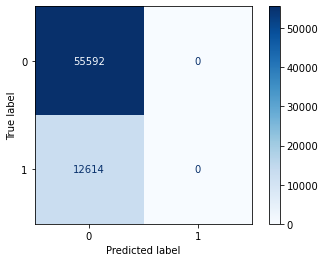

In [27]:
conf_mat_acc(decision_tree)

## 5.1 Evaluación sobre el dataset

In [28]:
# ahora hay que preparar el dataset para evaluación
print(dataset.head(3))
dataset.info()

              Fecha-I Vlo-I Ori-I Des-I Emp-I             Fecha-O Vlo-O Ori-O  \
0 2017-01-01 23:30:00   226  SCEL  KMIA   AAL 2017-01-01 23:33:00   226  SCEL   
1 2017-01-02 23:30:00   226  SCEL  KMIA   AAL 2017-01-02 23:39:00   226  SCEL   
2 2017-01-03 23:30:00   226  SCEL  KMIA   AAL 2017-01-03 23:39:00   226  SCEL   

  Des-O Emp-O  ...   AÑO   DIANOM  TIPOVUELO              OPERA  SIGLAORI  \
0  KMIA   AAL  ...  2017  Domingo          I  American Airlines  Santiago   
1  KMIA   AAL  ...  2017    Lunes          I  American Airlines  Santiago   
2  KMIA   AAL  ...  2017   Martes          I  American Airlines  Santiago   

  SIGLADES temporada_alta         dif_min  atraso_15 periodo_dia  
0    Miami              1 0 days 00:03:00          0           0  
1    Miami              1 0 days 00:09:00          0           0  
2    Miami              1 0 days 00:09:00          0           0  

[3 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205

In [29]:
# crear datset 
X_test = dataset[features]

print(X_test.shape)

(68206, 2)


In [30]:
# prediccion de atraso en dataset
Y_pred_log = logreg.predict(X_test)
Y_pred_tree = decision_tree.predict(X_test)
print(Y_pred_log[0:10])

[0 0 0 0 0 0 0 0 0 0]


## 6. Predicción

In [31]:
# prediciendo sobre el dataset
print(Y_pred_log[0:10])
print(Y_pred_tree[0:10])

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [32]:
# download_output(Y_pred_log, 'americo_pred_log.csv')
# download_output(Y_pred_tree, 'americo_pred_tree.csv')

## MUCHAS GRACIAS